# **Brain Tumor Detection Project**

# Import Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import warnings
warnings.filterwarnings('ignore')

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import files

# Upload & Unzip Dataset

In [41]:
uploaded = files.upload()


Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [42]:
!unzip brain_tumor_dataset.zip -d BrainTumorDataset


Archive:  brain_tumor_dataset.zip
replace BrainTumorDataset/brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Count Images in Each Class

In [43]:
# count the number of images in the respective classes 0- Brain Tumor and 1- healthy
ROOT_DIR = "/content/BrainTumorDataset/brain_tumor_dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('no', 98), ('yes', 155)])

In [44]:
len(os.listdir("/content/BrainTumorDataset/brain_tumor_dataset/yes"))

155

# Data Splitting Function

In [45]:
def dataFolder(p,split):
  number_of_images = {
        dir: len(os.listdir(os.path.join(ROOT_DIR, dir)))
        for dir in os.listdir(ROOT_DIR)
  }

    # Création du dossier train si n'existe pas
  if not os.path.exists("./" + p):
        os.mkdir("./" + p)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./" + p + "/" + dir, exist_ok=True)

            all_images = os.listdir(os.path.join(ROOT_DIR, dir))
            n_total = len(all_images)
            n_sample = math.floor(split * n_total) - 5

            # Sécurité : éviter n_sample négatif ou supérieur à n_total
            n_sample = max(0, min(n_sample, n_total))

            selected = np.random.choice(all_images, size=n_sample, replace=False)

            for img in selected:
                src = os.path.join(ROOT_DIR, dir, img)
                dst = os.path.join("./" + p, dir, img)
                shutil.copy2(src, dst)  # Copie sécurisée
  else:
    print(f"{p} folder already exists.")

# Split dataset

In [46]:
dataFolder("test", 0.15)

In [47]:
dataFolder("train", 0.7)

In [48]:
dataFolder("val", 0.15)

# CNN Model

In [49]:
# CNN Model
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Image Preprocessing: Preparing our data using Data Generator

In [53]:
def preprocessingImages1(path):
  """
  input : Path
  output :Pre processed images
  """
  image_data=ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
  )
  return image


In [54]:
path="/content/train"
train_data=preprocessingImages1(path)


Found 166 images belonging to 2 classes.


In [55]:
def preprocessingImages2(path):
  """
  input : Path
  output :Pre processed images
  """
  image_data=ImageDataGenerator(
      rescale=1./255,
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
  )
  return image


In [56]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 27 images belonging to 2 classes.


In [57]:
path="/content/val"
val_data=preprocessingImages2(path)


Found 27 images belonging to 2 classes.


# Early Stopping & Checkpoint

In [58]:
# Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='auto')

# Model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

# Model Training

In [60]:
history =model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cd
  )

Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.6544 - loss: 0.6103
Epoch 1: val_accuracy improved from 0.77778 to 0.81481, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - accuracy: 0.6520 - loss: 0.6074 - val_accuracy: 0.8148 - val_loss: 0.5052
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6841 - loss: 0.6129
Epoch 2: val_accuracy did not improve from 0.81481
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.6863 - loss: 0.6092 - val_accuracy: 0.7778 - val_loss: 0.5265
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.7675 - loss: 0.5602
Epoch 3: val_accuracy did not improve from 0.81481
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.7789 - loss: 0.5481 - val_accuracy: 0.8148 - val_loss: 0.4938
Epoch 4/30
5/8 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - accuracy: 0.7628 - loss: 0.5072
Epoch 4: val_accuracy did not improve from 0.81481
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.7569 - loss: 0.5247 - val_accuracy: 0.7778 - val_loss: 0.4772
Epoch 4: early stopping


In [61]:
h= history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Training & Validation Graphs

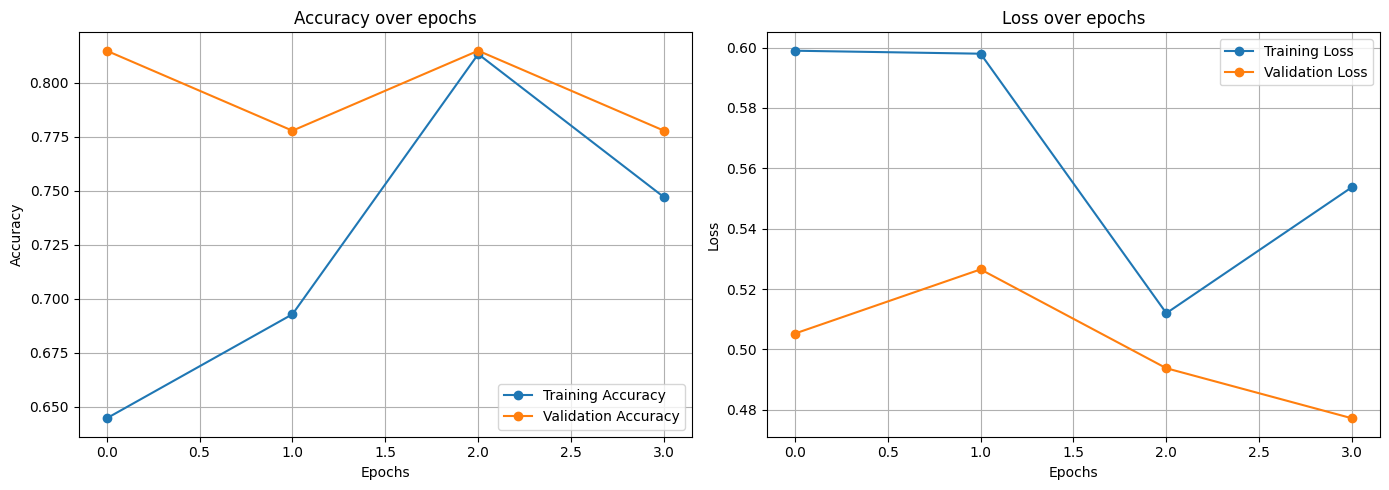

In [62]:
# Model Graphical Interpretation

import matplotlib.pyplot as plt
plt.style.use('default')
# Récupération des valeurs d'entraînement et de validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Création de la figure
plt.figure(figsize=(14, 5))

# Précision (Accuracy)
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='o')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Perte (Loss)
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Evaluate on Test Set

In [63]:
# Model Accuracy
model = load_model('/content/best_model.h5')

# Model Accuracy

In [64]:
acc=model.evaluate(test_data)[1]

print(f"The accuracy of the model is {acc*100} %")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - accuracy: 0.8519 - loss: 0.4564
The accuracy of the model is 85.18518805503845 %


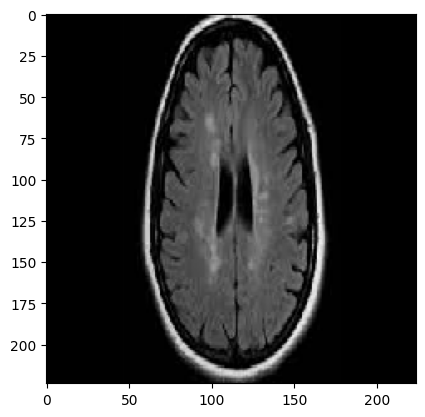

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Prediction score: 0.38992363
✅ No brain tumor detected


In [65]:
path="/content/BrainTumorDataset/brain_tumor_dataset/no/13 no.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape
input_arr = np.expand_dims(input_arr,axis =0)  # Convert single image to a batch.
predictions = model.predict(input_arr)[0][0]
predictions

print("Prediction score:", predictions)
if predictions > 0.5:
    print("⚠️ Brain tumor detected")
else:
    print("✅ No brain tumor detected")